In [45]:
import pandas as pd
import numpy as np
import midterm1_helper as mh
import matplotlib.pyplot as plt
import re


In [2]:
hf_series = pd.read_excel('data/proshares_analysis_data.xlsx',sheet_name='hedge_fund_series')
merrill_factors = pd.read_excel('data/proshares_analysis_data.xlsx',sheet_name='merrill_factors',index_col=0)
other_data = pd.read_excel('data/proshares_analysis_data.xlsx',sheet_name='other_data',index_col=0)

In [3]:
hf_series.head()

,Unnamed: 0,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
0,2011-08-31,-0.032149,-0.025588,-0.025689,-0.027036,-0.006489
1,2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022141
2,2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025239
3,2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007964
4,2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001822


In [4]:
# Set Index - Date
hf_series = hf_series.rename(columns={'Unnamed: 0':'Date'})
hf_series.set_index('Date', inplace=True)
hf_series.head()

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Date,,,,,
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027036,-0.006489
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022141
2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025239
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007964
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001822


In [5]:
mh.return_metrics(hf_series, portfolio=None, annual_factor=12)

,Mean,Vol,Sharpe,Min,Max
HFRIFWI Index,0.048295,0.059476,0.812004,-0.090784,0.058602
MLEIFCTR Index,0.036286,0.056136,0.646398,-0.053234,0.058886
MLEIFCTX Index,0.034605,0.055980,0.618172,-0.052384,0.058805
HDG US Equity,0.024812,0.058408,0.424805,-0.059183,0.058305
QAI US Equity,0.025653,0.050009,0.512971,-0.056347,0.039787


In [6]:
mh.risk_metrics(hf_series, portfolio=None, quantile=0.05, relative=False, mdd=True)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-0.963318,5.763074,-0.024293,-0.037478,-0.115473,2019-12-31,2020-03-31,2020-08-31,244 days
MLEIFCTR Index,-0.265394,1.631580,-0.028189,-0.035857,-0.124302,2021-06-30,2022-09-30,2024-02-29,974 days
MLEIFCTX Index,-0.251279,1.595863,-0.028095,-0.035816,-0.124388,2021-06-30,2022-09-30,2024-02-29,974 days
HDG US Equity,-0.254201,1.759250,-0.030932,-0.037575,-0.140720,2021-06-30,2022-09-30,2024-07-31,1127 days
QAI US Equity,-0.434775,1.605934,-0.017895,-0.032695,-0.137716,2021-06-30,2022-09-30,2024-02-29,974 days


In [7]:
mh.get_ols_metrics(regressors=merrill_factors['SPY US Equity'], targets=hf_series, annualization=12, ignorenan=True, intercept=True).T

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
alpha,-0.001145,-0.012761,-0.014269,-0.025474,-0.016965
Beta: SPY US Equity,0.346131,0.343383,0.342171,0.352053,0.298376
r-squared,0.711480,0.786051,0.784862,0.763208,0.747822
Volatility of Residuals,0.031947,0.025965,0.025965,0.028422,0.025113
Treynor Ratio,0.139528,0.105672,0.101134,0.070478,0.085976
Info Ratio,-0.035836,-0.491479,-0.549547,-0.896268,-0.675558


MIN Correlation pair is ('HFRIFWI Index', 'QAI US Equity')
MAX Correlation pair is ('MLEIFCTX Index', 'MLEIFCTR Index')


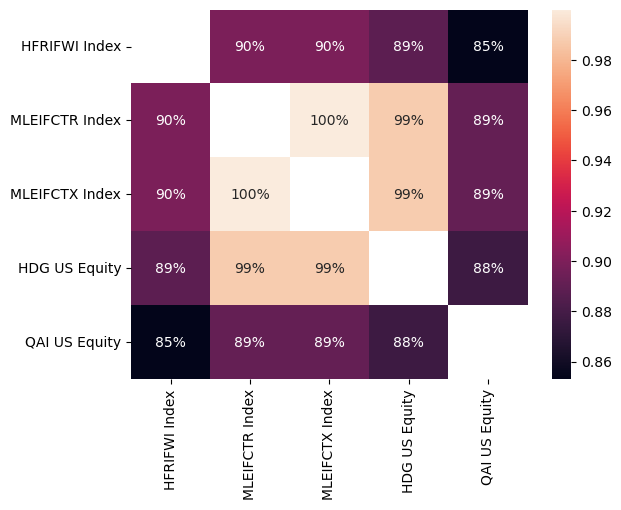

In [8]:
mh.display_correlation(df=hf_series,annot=True,list_maxmin=True)

In [9]:
# Static Insample with Intercept
mh.get_ols_metrics(regressors=merrill_factors, targets=hf_series['HFRIFWI Index'], annualization=12, ignorenan=True, intercept=True).T

,HFRIFWI Index
alpha,0.014824
Beta: SPY US Equity,0.036483
Beta: USGG3M Index,0.146336
Beta: EEM US Equity,0.081611
Beta: EFA US Equity,0.084638
Beta: EUO US Equity,0.028806
Beta: IWM US Equity,0.145111
r-squared,0.839676
Volatility of Residuals,0.023815
Info Ratio,0.622478


In [10]:
# Static Insample without Intercept
mh.get_ols_metrics(regressors=merrill_factors, targets=hf_series['HFRIFWI Index'], annualization=12, ignorenan=True, intercept=False).T

,HFRIFWI Index
alpha,0.0
Beta: SPY US Equity,0.050667
Beta: USGG3M Index,0.499336
Beta: EEM US Equity,0.080866
Beta: EFA US Equity,0.079146
Beta: EUO US Equity,0.031373
Beta: IWM US Equity,0.142651
r-squared,0.845162
Volatility of Residuals,0.023908
Info Ratio,None


In [11]:
rolling_betas_with_int, rolling_betas_without_int, replication_results, performance_metrics = mh.get_rolling_ols_metrics(
    regressors=merrill_factors,
    targets=hf_series['HFRIFWI Index'],
    window=60,
    annualization=12,
    intercept=True
)

In [12]:
rolling_betas_with_int.tail()

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Date,,,,,,,
2024-05-31,0.003754,-0.005914,-0.205822,0.104899,0.018399,0.027153,0.228200
2024-06-30,0.003864,-0.011391,-0.253834,0.101264,0.024686,0.025227,0.230355
2024-07-31,0.003823,0.009341,-0.442590,0.110699,0.027648,0.034371,0.207162
2024-08-31,0.003744,0.009885,-0.407423,0.110837,0.027656,0.032872,0.206847
2024-09-30,0.004033,0.003148,-0.438009,0.113829,0.043127,0.043991,0.202864


In [13]:
rolling_betas_without_int.tail()

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Date,,,,,,
2024-05-31,0.024582,0.751372,0.109796,0.000602,0.036313,0.221889
2024-06-30,0.014905,0.707672,0.102983,0.011491,0.033980,0.225585
2024-07-31,0.034318,0.510025,0.112094,0.014953,0.042024,0.202922
2024-08-31,0.034005,0.517201,0.112858,0.014170,0.040149,0.203582
2024-09-30,0.030052,0.551628,0.115575,0.025910,0.049764,0.200071


In [14]:
replication_results.tail()

,HFRIFWI Index,Rolling-IS-Int,Rolling-OOS-Int,Rolling-IS-NoInt,Rolling-OOS-NoInt,Static-IS-Int,Static-IS-NoInt
Date,,,,,,,
2024-05-31,0.0141,0.016235,0.016488,0.016948,0.017349,0.016109,0.016691
2024-06-30,-0.0003,0.002749,0.003343,0.004724,0.005754,0.003059,0.004090
2024-07-31,0.0127,0.024480,0.027494,0.024272,0.027216,0.019724,0.019770
2024-08-31,0.0025,-0.000435,-0.000579,-0.000300,-0.000361,0.002795,0.003159
2024-09-30,0.0123,0.010330,0.010137,0.010563,0.010378,0.008683,0.008977


In [15]:
metrics_df = pd.DataFrame(performance_metrics, index=[0]).T
metrics_df.columns = ['Value']

# Manually create 'Method' and 'Metric' columns
metrics_df['Method'] = ['IS_Int', 'IS_Int', 'IS_Int',
                        'OOS_Int', 'OOS_Int', 'OOS_Int',
                        'IS_NoInt', 'IS_NoInt', 'IS_NoInt',
                        'OOS_NoInt', 'OOS_NoInt', 'OOS_NoInt',
                        'Static_IS_Int', 'Static_IS_Int', 'Static_IS_Int',
                        'Static_IS_NoInt', 'Static_IS_NoInt', 'Static_IS_NoInt']

metrics_df['Metric'] = ['R²', 'Corr', 'MeanError',
                        'R²', 'Corr', 'MeanError',
                        'R²', 'Corr', 'MeanError',
                        'R²', 'Corr', 'MeanError',
                        'R²', 'Corr', 'MeanError',
                        'R²', 'Corr', 'MeanError']

clean_df = metrics_df.pivot(index='Metric', columns='Method', values='Value')
clean_df


Method,IS_Int,IS_NoInt,OOS_Int,OOS_NoInt,Static_IS_Int,Static_IS_NoInt
Metric,,,,,,
Corr,0.936647,0.931222,0.897579,0.893393,9.163385e-01,0.915694
MeanError,0.001299,0.001049,0.001306,0.000909,-8.005200e-16,0.000729
R²,0.905729,0.899213,0.852619,0.847507,8.396762e-01,0.836600


In [16]:
round(replication_results['Rolling-IS-Int'].mean(),4)

0.0039

In [17]:
round(replication_results['Rolling-IS-NoInt'].mean(), 4)

0.0042

In [18]:
round(replication_results['HFRIFWI Index'].mean(), 4)

0.004

In [19]:
round(replication_results['Static-IS-Int'].mean(),4)

0.004

In [20]:
round(replication_results['Static-IS-NoInt'].mean(),4)

0.0033

In [21]:
mh.get_nnls_estimates(regressors=merrill_factors, targets=hf_series['HFRIFWI Index']).T

,HFRIFWI Index
alpha,0.001235
SPY US Equity,0.036483
USGG3M Index,0.146336
EEM US Equity,0.081611
EFA US Equity,0.084638
EUO US Equity,0.028806
IWM US Equity,0.145111
r-squared,0.839676


In [22]:
bounds = [(0, 1)] * len(merrill_factors.columns)  # Example: constrain all betas between 0 and 1
mh.get_glm_estimates_with_constraints(regressors=merrill_factors, targets=hf_series['HFRIFWI Index'], bounds=bounds).T

/Users/anandtheerthanakhate/Desktop/finm-portfolio-2024/midterm1_helper.py:351: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[idx] = max(lower_bound, min(model.params[idx], upper_bound))
/Users/anandtheerthanakhate/Desktop/finm-portfolio-2024/midterm1_helper.py:351: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  model.params[idx] = max(lower_bound, min(model.params[idx], upper_bound))


,HFRIFWI Index
alpha,0.001235
SPY US Equity,0.036483
USGG3M Index,0.146336
EEM US Equity,0.081611
EFA US Equity,0.084638
EUO US Equity,0.028806
IWM US Equity,0.145111


In [23]:
mh.get_ols_metrics(regressors=merrill_factors, targets=other_data['HEFA US Equity'], annualization=12, ignorenan=True, intercept=True).T

,HEFA US Equity
alpha,0.010952
Beta: SPY US Equity,0.049119
Beta: USGG3M Index,-0.061553
Beta: EEM US Equity,-0.057686
Beta: EFA US Equity,0.932391
Beta: EUO US Equity,0.339730
Beta: IWM US Equity,-0.004361
r-squared,0.964589
Volatility of Residuals,0.023287
Info Ratio,0.470313


In [24]:
mh.get_ols_metrics(
    regressors=merrill_factors, 
    targets=other_data['TRVCI Index'], 
    annualization=12, 
    ignorenan=True, 
    intercept=True
).T

,TRVCI Index
alpha,-0.018821
Beta: SPY US Equity,1.974144
Beta: USGG3M Index,0.174108
Beta: EEM US Equity,-0.051749
Beta: EFA US Equity,-0.144986
Beta: EUO US Equity,-0.055075
Beta: IWM US Equity,-0.242511
r-squared,0.709342
Volatility of Residuals,0.143389
Info Ratio,-0.131261


In [25]:
spy_and_tail = pd.concat([other_data[['TAIL US Equity']], merrill_factors['SPY US Equity']], axis=1).dropna()
mh.return_metrics(spy_and_tail)

,Mean,Vol,Sharpe,Min,Max
TAIL US Equity,-0.006222,0.032777,-0.189824,-0.089060,0.114038
SPY US Equity,0.012480,0.047669,0.261797,-0.124873,0.126983


In [26]:
spy_and_tail = pd.concat([other_data[['TAIL US Equity']], merrill_factors['SPY US Equity']], axis=1).dropna()
mh.risk_metrics(spy_and_tail).T

,TAIL US Equity,SPY US Equity
Skewness,1.058871,-0.50314
Kurtosis,3.415815,0.364517
VaR (0.05),-0.046425,-0.081143
CVaR (0.05),-0.066911,-0.095119
Max Drawdown,-0.477637,-0.239271
Peak,2017-05-31 00:00:00,2021-12-31 00:00:00
Bottom,2024-05-31 00:00:00,2022-09-30 00:00:00
Recover,NaT,2023-12-31 00:00:00
Duration (to Recover),NaT,730 days 00:00:00


In [27]:
mh.get_ols_metrics(
    regressors=merrill_factors, 
    targets=other_data['TAIL US Equity'], 
    annualization=12, 
    ignorenan=True, 
    intercept=True
).T

,TAIL US Equity
alpha,0.006494
Beta: SPY US Equity,-0.299856
Beta: USGG3M Index,0.005774
Beta: EEM US Equity,-0.051141
Beta: EFA US Equity,-0.213465
Beta: EUO US Equity,-0.330262
Beta: IWM US Equity,-0.063407
r-squared,0.602794
Volatility of Residuals,0.071559
Info Ratio,0.090754


In [28]:
spy_and_tail.corr()

,TAIL US Equity,SPY US Equity
TAIL US Equity,1.000000,-0.713173
SPY US Equity,-0.713173,1.000000


In [29]:
data = pd.read_excel('data/spy_data.xlsx', sheet_name='total returns')
data['date'] = pd.to_datetime(data['date'])
data['SPY Excess'] = data['SPY'] - data['^IRX']
df = data.copy().drop(columns=['SPY', '^IRX']).rename(columns={'date':'Date'}).set_index('Date')
df.head()

,SPY Excess
Date,
1994-01-04,0.003913
1994-01-05,0.001888
1994-01-06,-0.000121
1994-01-07,0.005897
1994-01-10,0.011841


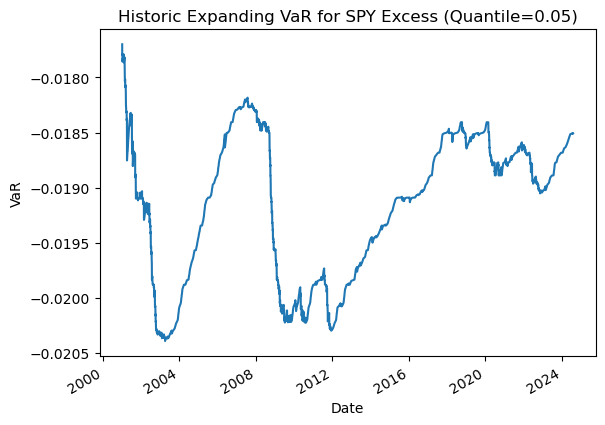

{'SPY Excess': 0.04859119284629661}


,VaR_SPY Excess,Below_VaR_SPY Excess
Date,,
2001-01-02,-0.017699,True
2001-01-03,-0.017794,False
2001-01-04,-0.017792,False
2001-01-05,-0.017789,True
2001-01-08,-0.017858,False


In [30]:
historic_expanding_var_df, historic_expanding_under_var_frequency = mh.calculate_historic_expanding_var(
    data = df, 
    start_date='2001-01-02',
    quantile=0.05, 
    min_window_size=60
)   
print(historic_expanding_under_var_frequency)
historic_expanding_var_df.loc['2001-01-02':].head()

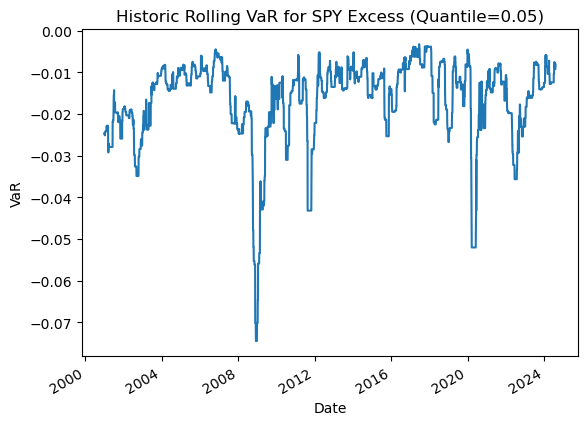

{'SPY Excess': 0.06799392610089422}


,VaR_SPY Excess,Below_VaR_SPY Excess
Date,,
2001-01-02,-0.024597,False
2001-01-03,-0.024597,False
2001-01-04,-0.024597,False
2001-01-05,-0.024597,True
2001-01-08,-0.025120,False


In [31]:
historic_rolling_var_df, historic_rolling_under_var_frequency = mh.calculate_historic_rolling_var(
    data = df, 
    start_date='2001-01-02',
    quantile=0.05, 
    window_size=60
)   
print(historic_rolling_under_var_frequency)
historic_rolling_var_df.loc['2001-01-02':].head()

In [32]:
hit_ratio_error = historic_rolling_under_var_frequency['SPY Excess']/0.05-1
abs(hit_ratio_error)

0.3598785220178844

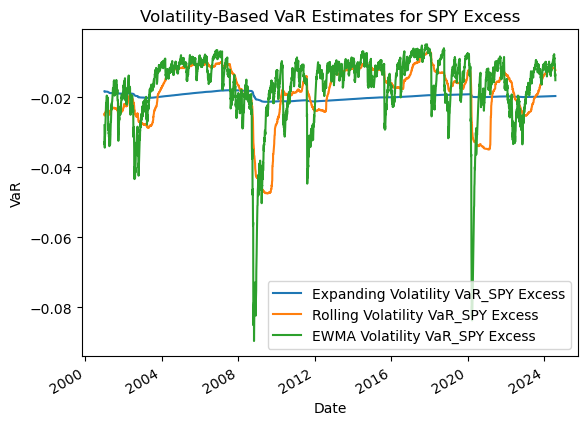

In [33]:
volatility_VaR = mh.calculate_volatility_var(
    data=df,
    ewma_theta=0.94,
    ewma_initial_vol=.2/np.sqrt(252),
    window_size=252, 
    z_score=-1.65, 
    start_date='2001-01-02'
)

In [34]:
volatility_VaR.tail()

,Expanding Volatility VaR_SPY Excess,Rolling Volatility VaR_SPY Excess,EWMA Volatility VaR_SPY Excess
Date,,,
2024-07-29,-0.019654,-0.012012,-0.013951
2024-07-30,-0.019653,-0.011983,-0.013527
2024-07-31,-0.019654,-0.012098,-0.013286
2024-08-01,-0.019654,-0.012185,-0.014423
2024-08-02,-0.019656,-0.012254,-0.015141


In [35]:
num_violations, hit_ratio, hit_error = mh.calculate_var_violations(
    var_series = historic_expanding_var_df['VaR_SPY Excess'].loc['2001-01-02':], 
    excess_returns = df['SPY Excess'].loc['2001-01-02':], 
    expected_quantile = 0.05)
print(num_violations, hit_ratio, hit_error )

288 0.04859119284629661 -0.028176143074067905


In [36]:
from cmds.portfolio_management_helper import calc_var_cvar_summary

VaR and CVaR are given shifted by 1.000000 period(s).


<Axes: title={'center': 'Volatility of SPY (Alternative EMWA Theta)'}, xlabel='Date', ylabel='Volatility'>

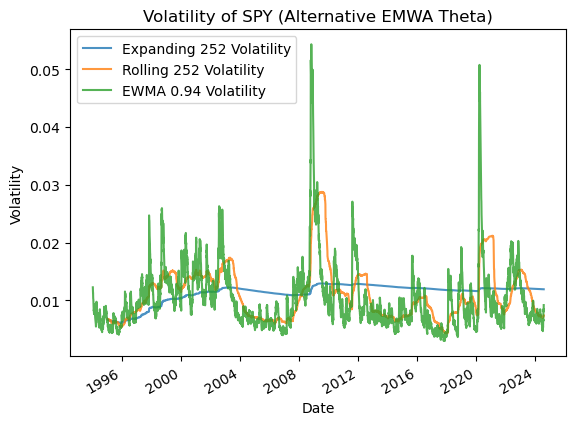

In [37]:
spy_volatility = calc_var_cvar_summary(
    df,
    window=252,
    quantile=.05,
    ewma_theta=.94,
    ewma_initial_vol=.2/np.sqrt(252),
    z_score=-1.65,
    keep_columns=["Volatility"],
    drop_columns=["GARCH"]
)
spy_volatility.plot(title="Volatility of SPY (Alternative EMWA Theta)", xlabel="Date", ylabel="Volatility", alpha=.8)

In [38]:
spy_volatility

,Expanding 252 Volatility,Rolling 252 Volatility,EWMA 0.94 Volatility
Date,,,
1994-01-04,NaN,NaN,NaN
1994-01-05,NaN,NaN,0.0123
1994-01-06,NaN,NaN,0.0119
1994-01-07,NaN,NaN,0.0115
1994-01-10,NaN,NaN,0.0113
...,...,...,...
2024-07-29,0.0119,0.0073,0.0085
2024-07-30,0.0119,0.0073,0.0082
2024-07-31,0.0119,0.0073,0.0081


In [39]:
spy_parametric_var = calc_var_cvar_summary(
    df,
    window=252,
    quantile=.05,
    ewma_theta=.94,
    ewma_initial_vol=.2/np.sqrt(252),
    z_score=-1.65,
    keep_columns=["Expanding 252 Parametric VaR", "Rolling 252 Parametric VaR", "EWMA 0.94 Parametric VaR"]
)
spy_parametric_var.tail(3)

VaR and CVaR are given shifted by 1.000000 period(s).


,Expanding 252 Parametric VaR (5.00%),Rolling 252 Parametric VaR (5.00%),EWMA 0.94 Parametric VaR (5.00%)
Date,,,
2024-07-31,-0.0197,-0.0120,-0.0133
2024-08-01,-0.0197,-0.0121,-0.0144
2024-08-02,-0.0197,-0.0122,-0.0151


<Axes: title={'center': 'Parametric VaR'}, xlabel='Date', ylabel='Returns'>

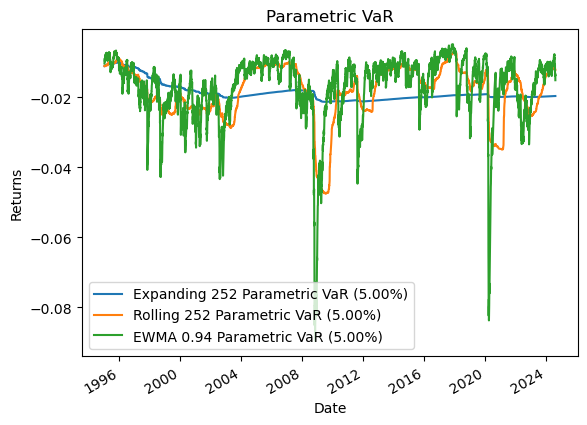

In [40]:
(
    spy_parametric_var
    .dropna()
    .plot(title="Parametric VaR", xlabel="Date", ylabel="Returns")
)

In [41]:
calc_var_cvar_summary(
    df,
    window=252,
    quantile=.05,
    ewma_theta=.94,
    ewma_initial_vol=.2/np.sqrt(252),
    filter_first_hit_ratio_date="2001-01-01",
    z_score=-1.65,
    return_hit_ratio=True,
    shift=1,
    drop_indexes=["GARCH"]
)

,Hit Ratio,Hit Ratio Error,Hit Ratio Absolute Error
Expanding 252 Historical VaR (5.00%),0.0486,-0.0282,0.0282
Rolling 252 Parametric VaR (5.00%),0.0528,0.0562,0.0562
Rolling 252 Historical VaR (5.00%),0.0530,0.0596,0.0596
Expanding 252 Parametric VaR (5.00%),0.0461,-0.0788,0.0788
EWMA 0.94 Parametric VaR (5.00%),0.0599,0.1979,0.1979


In [43]:
spy_cvar = pd.concat([
    mh.historical_expanding_cvar(df["SPY Excess"].shift()).to_frame("Expanding CVaR"),
    mh.historical_rolling_cvar(df["SPY Excess"].shift()).to_frame("Rolling CVaR")
], axis=1)
spy_cvar.tail(5)

,Expanding CVaR,Rolling CVaR
Date,,
2024-07-29,-0.0284,-0.0154
2024-07-30,-0.0284,-0.0154
2024-07-31,-0.0284,-0.0154
2024-08-01,-0.0284,-0.0154
2024-08-02,-0.0284,-0.0154


In [48]:
spy_var_cvar_stats = calc_var_cvar_summary(
    df,
    window=252,
    ewma_theta = 0.95,
    drop_columns=["GARCH"],
    z_score=-1.65
)
spy_var_cvar_stats
# spy_cvar = (
#     df
#     .loc[:, lambda df: df.columns[df.columns.map(lambda x: bool(re.search("CVaR", x)))]]
#      .loc["2001-01-01":]
# )
# spy_cvar.tail()

VaR and CVaR are given shifted by 1.000000 period(s).


,Returns,Expanding 252 Historical VaR (5.00%),Rolling 252 Historical VaR (5.00%),Expanding 252 Volatility,Rolling 252 Volatility,EWMA 0.95 Volatility,Expanding 252 Parametric VaR (5.00%),Rolling 252 Parametric VaR (5.00%),EWMA 0.95 Parametric VaR (5.00%),Expanding 252 Historical CVaR (5.00%),Rolling 252 Historical CVaR (5.00%),Expanding 252 Parametrical CVaR (5.00%),Rolling 252 Parametrical CVaR (5.00%),EWMA 0.95 Parametrical CVaR (5.00%)
Date,,,,,,,,,,,,,,
1994-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,0.0039,NaN,NaN,NaN,NaN,0.0123,NaN,NaN,-0.0203,NaN,NaN,NaN,NaN,-0.0252
1994-01-06,0.0019,NaN,NaN,NaN,NaN,0.0120,NaN,NaN,-0.0198,NaN,NaN,NaN,NaN,-0.0246
1994-01-07,-0.0001,NaN,NaN,NaN,NaN,0.0117,NaN,NaN,-0.0193,NaN,NaN,NaN,NaN,-0.0239
1994-01-10,0.0059,NaN,NaN,NaN,NaN,0.0115,NaN,NaN,-0.0189,NaN,NaN,NaN,NaN,-0.0235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29,0.0110,-0.0185,-0.0136,0.0119,0.0073,0.0081,-0.0197,-0.0120,-0.0134,-0.0284,-0.0154,-0.0244,-0.0149,-0.0166
2024-07-30,0.0004,-0.0185,-0.0136,0.0119,0.0073,0.0079,-0.0197,-0.0120,-0.0131,-0.0284,-0.0154,-0.0244,-0.0149,-0.0162
2024-07-31,-0.0053,-0.0185,-0.0136,0.0119,0.0073,0.0078,-0.0197,-0.0120,-0.0129,-0.0284,-0.0154,-0.0244,-0.0149,-0.0160


In [57]:
import cmds.portfolio_management_helper as pmh

In [56]:
assets_excess_returns = pd.read_excel("data/multi_asset_etf_data.xlsx", sheet_name="excess returns").set_index('Date')
assets_excess_returns.tail()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2024-05-31,0.0096,-0.0076,0.0149,0.0460,0.0118,0.0134,0.0447,0.0345,0.0089,0.0460,0.0132
2024-06-30,-0.0137,-0.0059,0.0220,-0.0225,0.0006,0.0080,0.0146,-0.0213,-0.0010,0.0311,0.0034
2024-07-31,0.0339,-0.0326,0.0039,0.0213,0.0189,0.0244,0.0716,0.0640,0.0067,0.0075,0.0127
2024-08-31,0.0255,-0.0258,0.0048,0.0276,0.0105,0.0085,0.0490,-0.0038,0.0027,0.0184,0.0030
2024-09-30,0.0233,0.0049,0.0701,0.0067,0.0131,0.0120,0.0188,0.0518,0.0103,0.0123,0.0110


In [58]:
pmh.calc_summary_statistics(
    assets_excess_returns,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Vol', 'Annualized Mean', 'Annualized Sharpe']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
BWX,-0.0119,0.0817,-0.1456
DBC,-0.0091,0.1685,-0.0539
EEM,0.0270,0.1799,0.1498
EFA,0.0550,0.1522,0.3616
HYG,0.0374,0.0773,0.4833
IEF,0.0139,0.0632,0.2206
IYR,0.0779,0.1696,0.4594
PSP,0.0929,0.2152,0.4314
QAI,0.0150,0.0490,0.3052
SPY,0.1270,0.1431,0.8876


In [59]:
(
    pmh.calc_summary_statistics(
        assets_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Annualized Sharpe']
    )
    .sort_values("Annualized Sharpe")
    .reset_index()
    .loc[lambda df: df.index.isin([0, len(df.index)-1])]
    .rename(columns={"index": "Asset"})
    .assign(Label=["Worst Sharpe", "Best Sharpe"])
)

,Asset,Annualized Sharpe,Label
0,BWX,-0.1456,Worst Sharpe
10,SPY,0.8876,Best Sharpe


The highest correlation (91.06%) is between EFA and PSP
The lowest correlation (-30.05%) is between IEF and DBC


<Axes: >

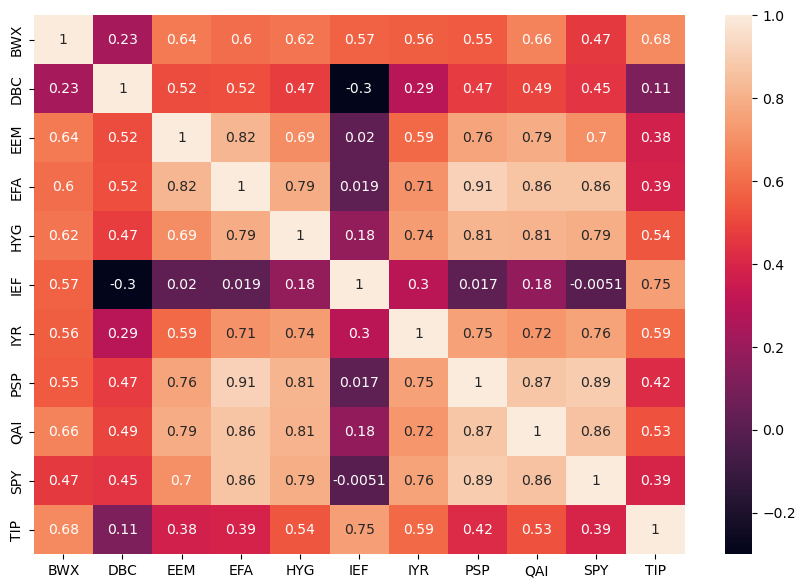

In [60]:
pmh.calc_correlations(assets_excess_returns)

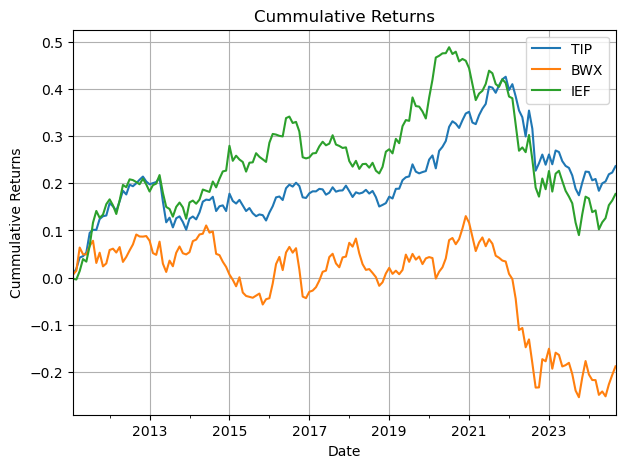

In [61]:
pmh.calc_cummulative_returns(assets_excess_returns[['TIP', 'BWX', 'IEF']])

In [63]:
pmh.calc_summary_statistics(
    assets_excess_returns[['TIP', 'BWX', 'IEF']],
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=[
        "Annualized Mean", "Annualized Vol", "Annualized Sharpe"
    ]
).transpose()

,TIP,BWX,IEF
Annualized Mean,0.0168,-0.0119,0.0139
Annualized Vol,0.0513,0.0817,0.0632
Annualized Sharpe,0.3286,-0.1456,0.2206


In [77]:
analysis_sharpe_vs_tangent_weights = (
    pmh.calc_summary_statistics(
        assets_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Tangency Weights', 'Annualized Sharpe']
    )
    .sort_values('Annualized Sharpe', ascending=False)
)
analysis_sharpe_vs_tangent_weights

,Annualized Sharpe,Tangency Weights
SPY,0.8876,-4.9041
HYG,0.4833,-0.8326
IYR,0.4594,0.8771
PSP,0.4314,0.2770
EFA,0.3616,0.5307
TIP,0.3286,0.5104
QAI,0.3052,7.2206
IEF,0.2206,-4.6825
EEM,0.1498,-0.6157
DBC,-0.0539,-0.1112


,Tangency Weights
BWX,2.7303
DBC,-0.1112
EEM,-0.6157
EFA,0.5307
HYG,-0.8326
IEF,-4.6825
IYR,0.8771
PSP,0.2770
QAI,7.2206
SPY,-4.9041


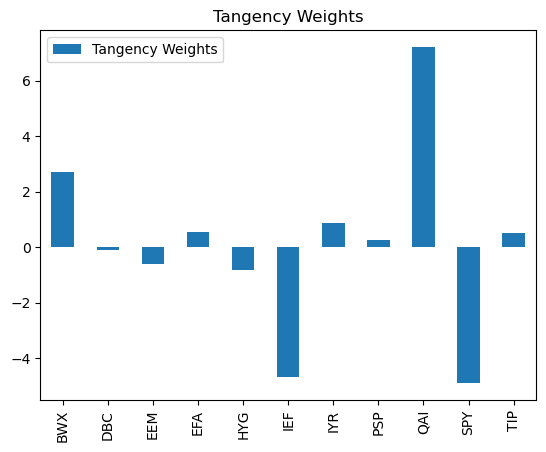

In [85]:
pmh.calc_tangency_weights(assets_excess_returns,return_graphic=True)

In [81]:
pmh.calc_summary_statistics(
    pmh.calc_tangency_weights(assets_excess_returns, name="Tangency", return_port_ret=True),
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Sharpe', 'Annualized Mean', 'Annualized Vol']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,-0.5273,0.3285,-1.6050


In [67]:
TIP_ADJUSTMENT = 0.0012

# Modified TIPS
assets_excess_returns_modified_tips = (
    assets_excess_returns
    .assign(TIP=lambda df: df.TIP + TIP_ADJUSTMENT)
)

# No TIPS
assets_excess_returns_no_tips = assets_excess_returns.drop("TIP", axis=1)

pd.concat([
    pmh.calc_tangency_weights(assets_excess_returns_no_tips, name="No TIPS Tangency"),
    pmh.calc_tangency_weights(assets_excess_returns_modified_tips, name="Mod TIPS Tangency"),
    pmh.calc_tangency_weights(assets_excess_returns)
], axis=1)

,No TIPS Tangency Weights,Mod TIPS Tangency Weights,Tangency Weights
BWX,3.0159,29.2601,2.7303
DBC,-0.0910,1.7716,-0.1112
EEM,-0.6642,-5.1230,-0.6157
EFA,0.5406,1.4514,0.5307
HYG,-0.8716,-4.4601,-0.8326
IEF,-4.8324,-18.6046,-4.6825
IYR,0.9902,11.3761,0.8771
PSP,0.3249,4.7252,0.2770
QAI,7.9769,77.4621,7.2206
SPY,-5.3893,-49.9636,-4.9041


In [68]:
analysis_tips_portfolios = pd.concat([
    pmh.calc_tangency_weights(assets_excess_returns_modified_tips, name="Mod TIPS Tangency", return_port_ret=True),
    pmh.calc_tangency_weights(assets_excess_returns_no_tips, name="No TIPS Tangency", return_port_ret=True),
    pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True)
], axis=1)

pmh.calc_summary_statistics(
    analysis_tips_portfolios,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Mod TIPS Tangency Portfolio,-6.1740,3.6558,-1.6888
No TIPS Tangency Portfolio,-0.5808,0.3621,-1.6039
Tangency Portfolio,-0.5273,0.3285,-1.6050


In [70]:
n_assets = len(assets_excess_returns.columns)
MU_MONTH_TARGET = 0.010

portfolio_equal_weights_not_scaled = pmh.create_portfolio(
    assets_excess_returns,
    weights=[1 / n_assets for _ in range(n_assets)],
    port_name="Equal Weights"
)
portfolio_equal_weights = portfolio_equal_weights_not_scaled * MU_MONTH_TARGET / portfolio_equal_weights_not_scaled.mean()
portfolio_equal_weights

,Equal Weights
date,
2011-02-28,0.0610
2011-03-31,0.0256
2011-04-30,0.1041
2011-05-31,-0.0351
2011-06-30,-0.0463
...,...
2024-05-31,0.0639
2024-06-30,0.0042
2024-07-31,0.0631


In [71]:
asset_variance_dict = assets_excess_returns.std().map(lambda x: x ** 2).to_dict()
asset_inv_variance_dict = {asset: 1 / variance for asset, variance in asset_variance_dict.items()}
portfolio_risk_parity_not_scaled = pmh.create_portfolio(
    assets_excess_returns,
    weights=asset_inv_variance_dict,
    port_name="Risk Parity"
)
portfolio_risk_parity = portfolio_risk_parity_not_scaled * MU_MONTH_TARGET / portfolio_risk_parity_not_scaled.mean()
portfolio_risk_parity

,Risk Parity
date,
2011-02-28,0.0477
2011-03-31,0.0326
2011-04-30,0.1392
2011-05-31,0.0030
2011-06-30,-0.0323
...,...
2024-05-31,0.0774
2024-06-30,0.0070
2024-07-31,0.0910


In [72]:
portfolio_tangency_not_scaled = pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True)
portfolio_tangency = portfolio_tangency_not_scaled * MU_MONTH_TARGET / portfolio_tangency_not_scaled.mean()
portfolio_tangency

,Tangency Portfolio
date,
2011-02-28,0.0152
2011-03-31,-0.0036
2011-04-30,-0.0241
2011-05-31,0.0204
2011-06-30,-0.0004
...,...
2024-05-31,0.0310
2024-06-30,0.0571
2024-07-31,-0.0168


In [87]:
portfolio_regularized_not_scaled = pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True, cov_mat=.5, name="Regularized")
portfolio_regularized = portfolio_regularized_not_scaled * MU_MONTH_TARGET / portfolio_regularized_not_scaled.mean()
portfolio_regularized

,Regularized Portfolio
date,
2011-02-28,0.0241
2011-03-31,-0.0120
2011-04-30,0.0024
2011-05-31,0.0203
2011-06-30,-0.0089
...,...
2024-05-31,0.0411
2024-06-30,0.0318
2024-07-31,0.0143


In [86]:
portfolios = pd.concat([
    portfolio_equal_weights,
    portfolio_risk_parity,
    portfolio_regularized,
    portfolio_tangency
], axis=1)
pmh.calc_summary_statistics(
    portfolios,
    provided_excess_returns=True,
    annual_factor=12,
    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe']
)

NameError: name 'portfolio_regularized' is not defined